In [1]:
%matplotlib notebook

import pandas as pd
import numpy as np
import rampy
import rampy as rp
from rampy import maps
from rampy import peak_shapes
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

In [2]:
# file name
file='./ZA0214.txt'

In [3]:
my_map = maps.map(file, spectrometer_type="horiba")
my_map.w = my_map.w.astype(float)

In [4]:
my_map

<IPython.core.display.Javascript object>


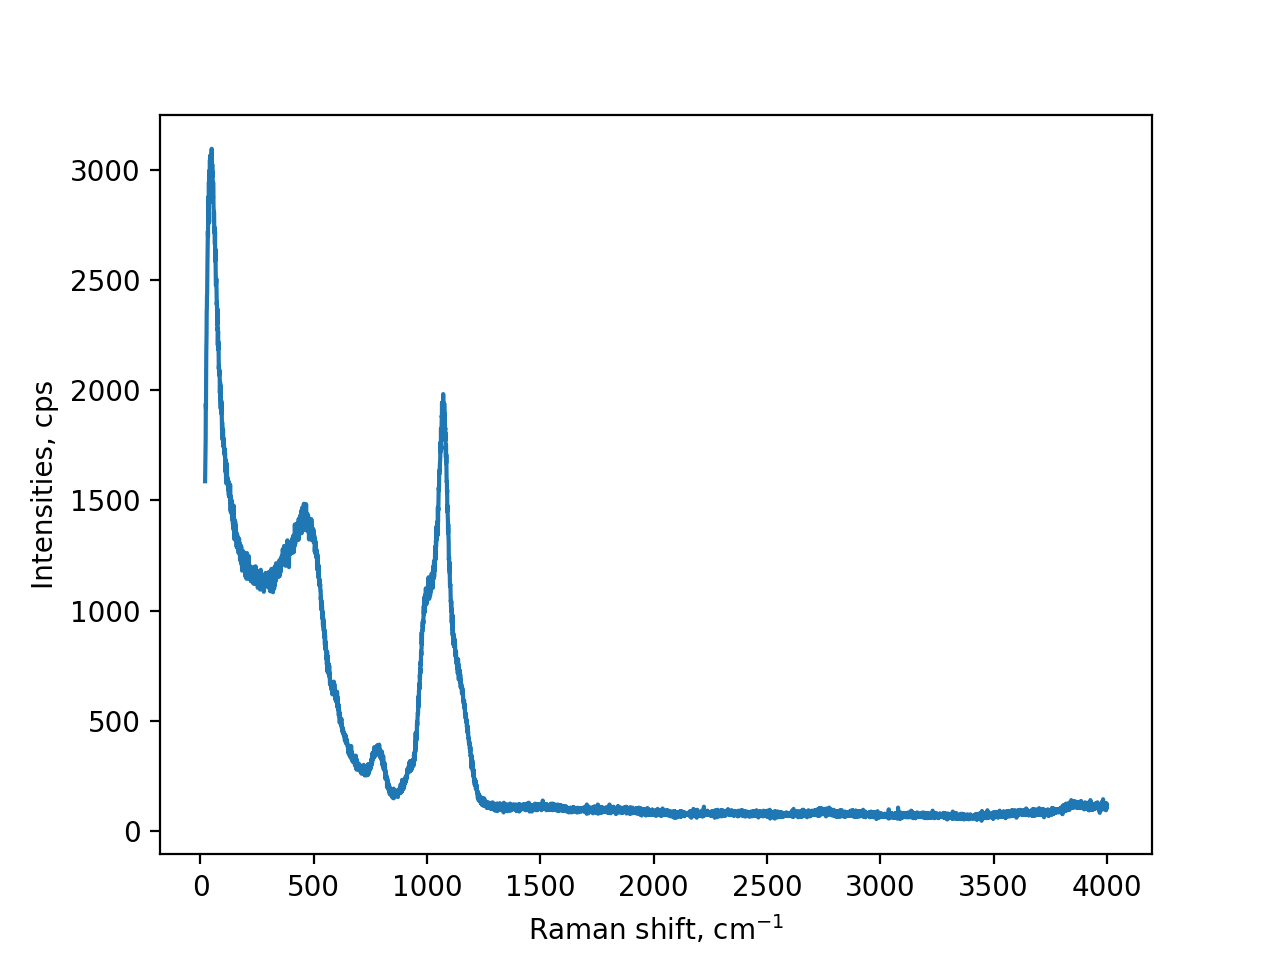

In [5]:
plt.figure()
plt.plot(my_map.w, my_map.I[:,1])
plt.xlabel('Raman shift, cm$^{-1}$')
#plt.xticks(np.arange(0, 1, 10))

plt.ylabel("Intensities, cps")

plt.show()

In [6]:
bir = np.array([[1400,2300],[2600,3000],[3900,4050]])
my_map.background(bir, "poly",polynomial_order=1)

<IPython.core.display.Javascript object>


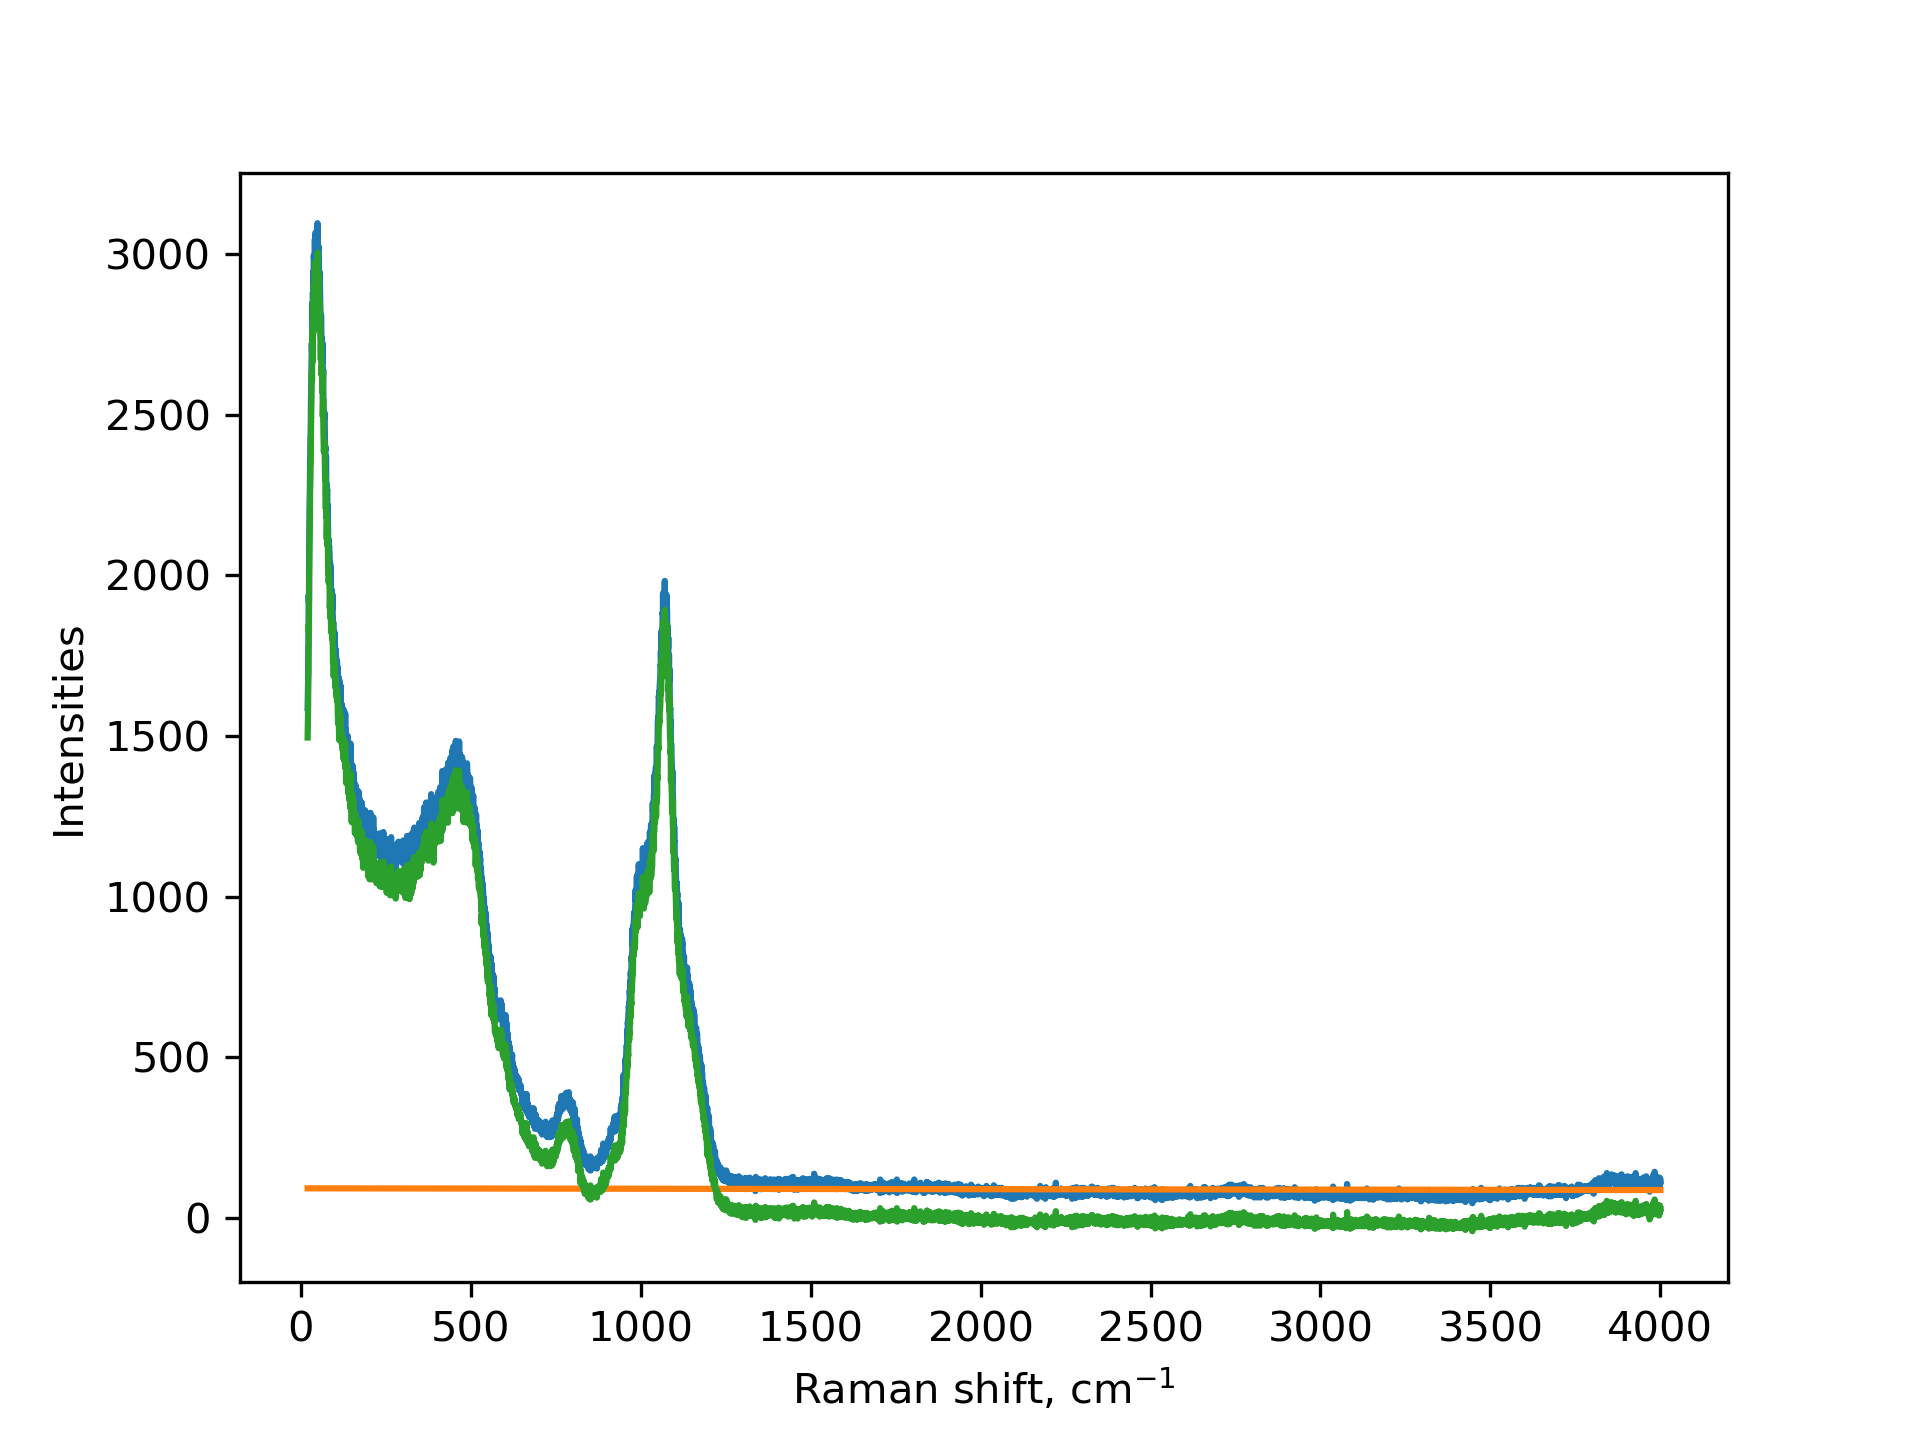

In [7]:
plt.figure(dpi=150)

# we plot the original signal
plt.plot(my_map.w, my_map.I[:,1])

# we plot the background
plt.plot(my_map.w, my_map.I_background[:,1])

# we plot the corrected spectra
plt.plot(my_map.w, my_map.I_corrected[:,1])

plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
plt.show()

<IPython.core.display.Javascript object>


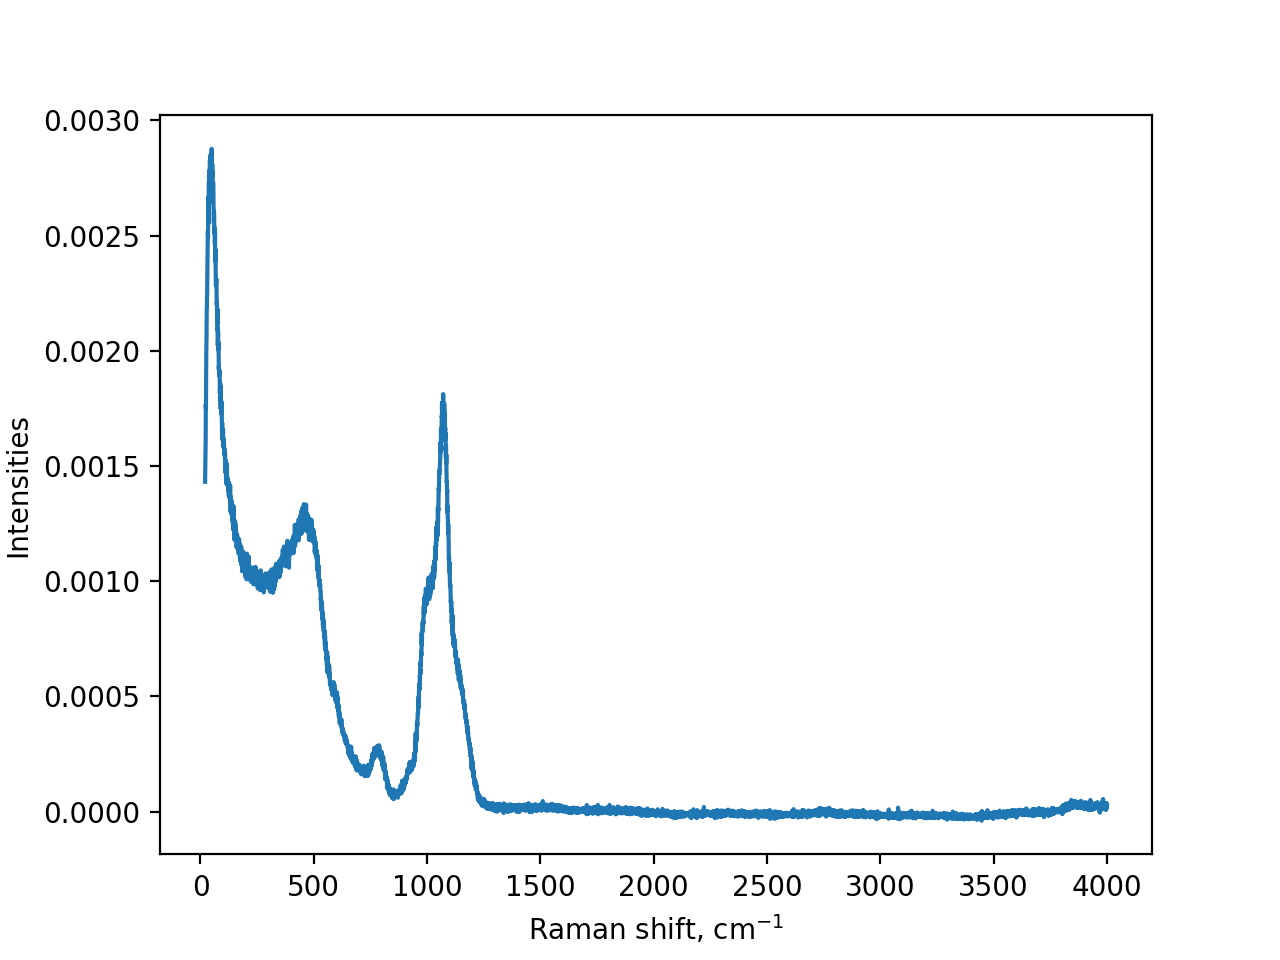

In [8]:
my_map.normalise(my_map.I_corrected, method = "area")

plt.figure()

# we plot the normalised spectra
plt.plot(my_map.w, my_map.I_normalised[:,1])

plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
plt.show()

In [9]:
region_of_interest = np.array([[840,1275]])
my_map.centroid(my_map.I_normalised, region_of_interest)
my_map.intensity(my_map.I_normalised*1000, region_of_interest)

<IPython.core.display.Javascript object>


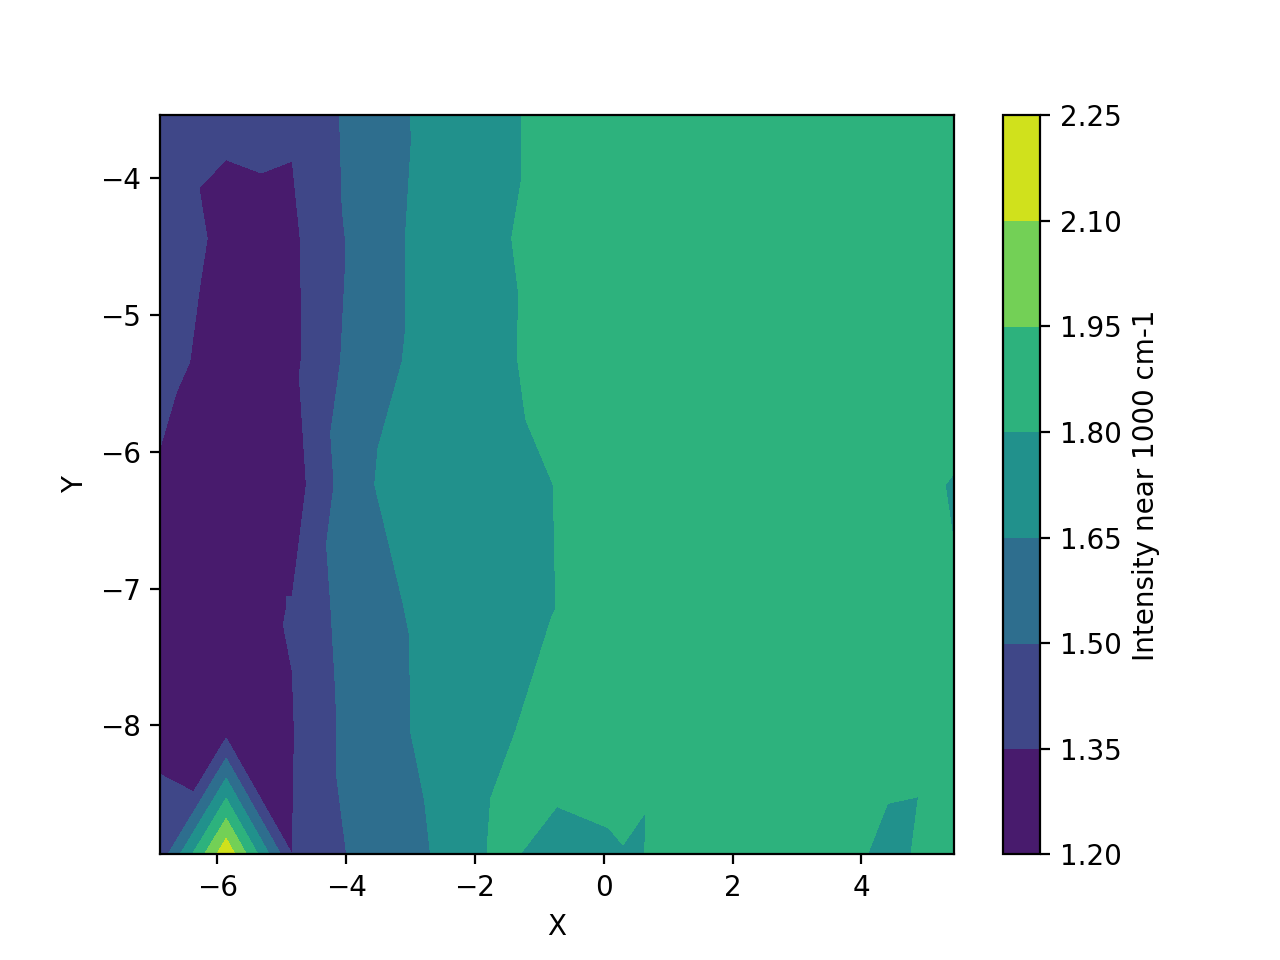

In [10]:
plt.figure()
plt.tricontourf(my_map.X, my_map.Y, my_map.I_max)
plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Intensity near 1000 cm-1")

<IPython.core.display.Javascript object>


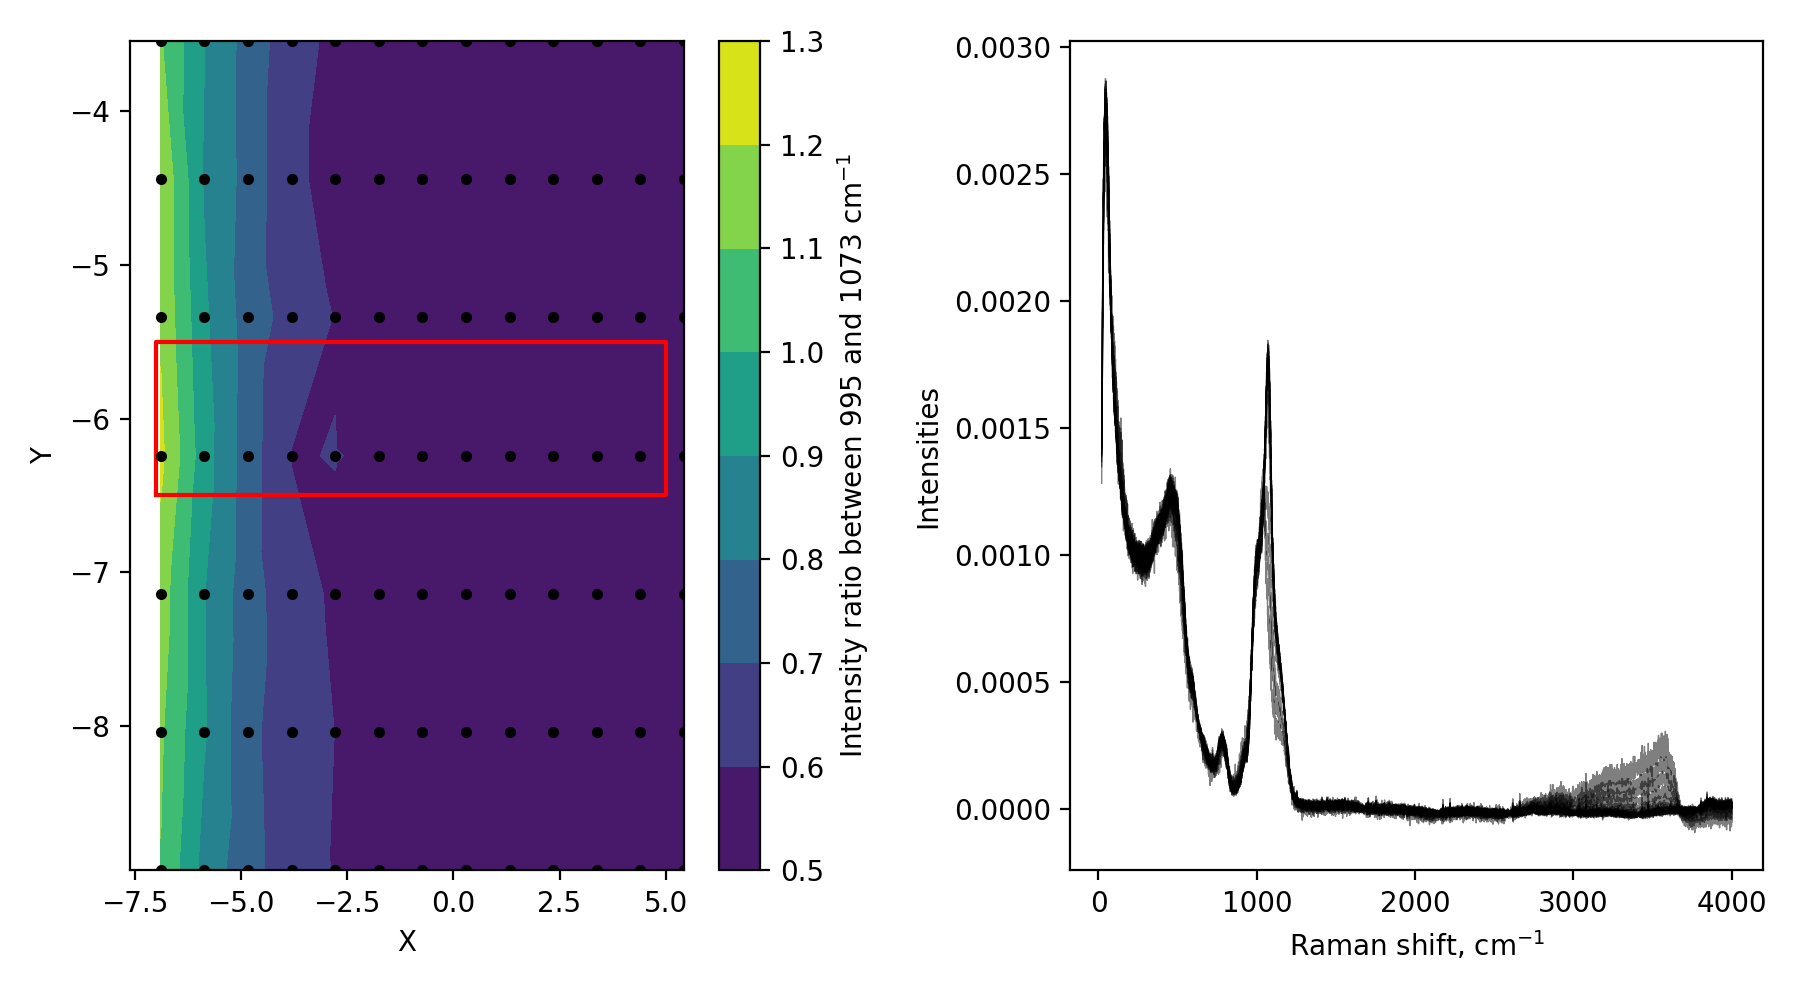

In [11]:
region_of_interest_for_ratio = np.array([[994,996],[1070,1075]])
my_map.intensity_ratio(my_map.I_normalised, region_of_interest_for_ratio)

X_low = -7
X_high = 5
Y_low = -6.5
Y_high = -5.5

plt.figure(figsize=(9,5))
plt.subplot(1,2,1)
plt.tricontourf(my_map.X, my_map.Y, my_map.I_ratio)
plt.plot([X_low, X_high, X_high, X_low, X_low], 
         [Y_low, Y_low, Y_high, Y_high, Y_low], "r-")
plt.plot(my_map.X, my_map.Y, "k.")

plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Intensity ratio between 995 and 1073 cm$^{-1}$")

plt.subplot(1,2,2)

idx_sp = np.where((my_map.X>X_low)&(my_map.X<X_high)&(my_map.Y>Y_low)&(my_map.Y<Y_high))
for i in idx_sp:
    plt.plot(my_map.w, my_map.I_normalised[:,i],"k-",alpha=0.5, linewidth=0.5)
    
plt.xlabel('Raman shift, cm$^{-1}$')
plt.ylabel("Intensities")
    
plt.tight_layout()

<IPython.core.display.Javascript object>


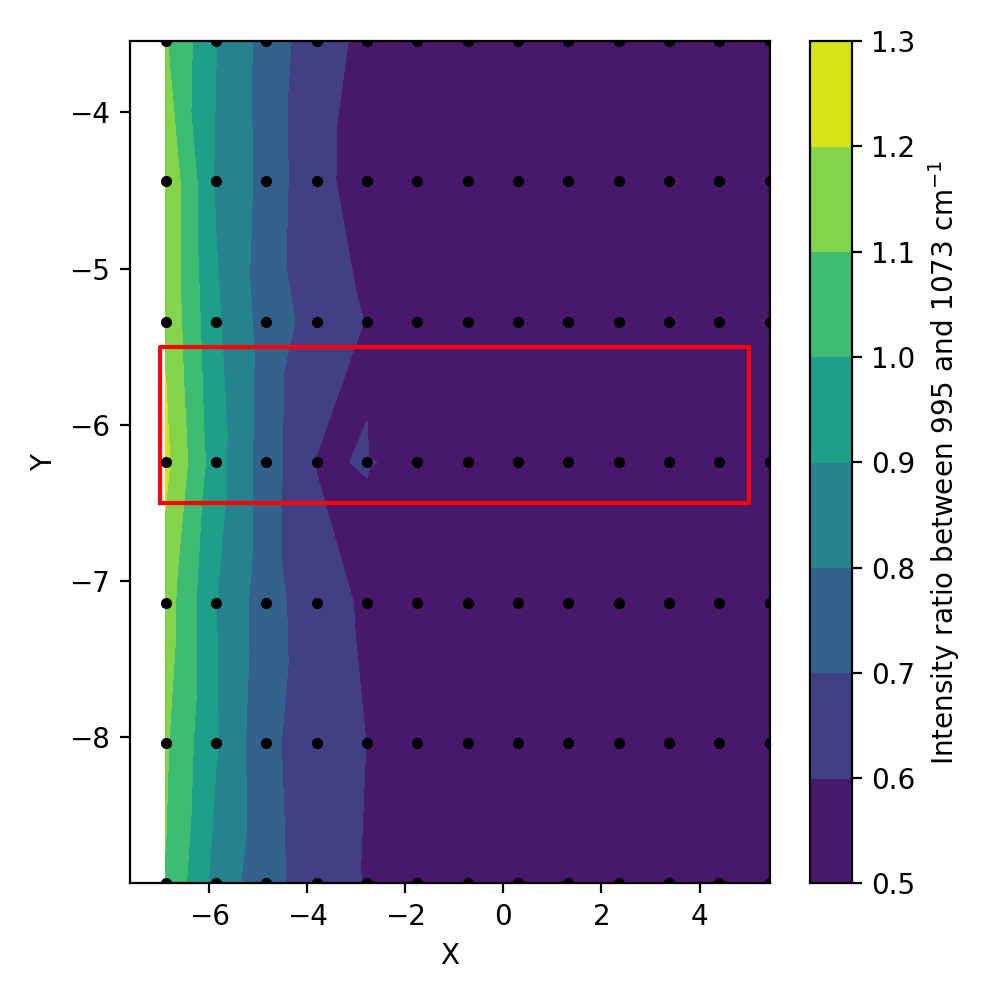

In [12]:
region_of_interest_for_ratio = np.array([[994,996],[1070,1075]])
my_map.intensity_ratio(my_map.I_normalised, region_of_interest_for_ratio)

X_low = -7
X_high = 5
Y_low = -6.5
Y_high = -5.5

plt.figure(figsize=(5,5))
plt.subplot(1,1,1)
plt.tricontourf(my_map.X, my_map.Y, my_map.I_ratio)
plt.plot([X_low, X_high, X_high, X_low, X_low], 
         [Y_low, Y_low, Y_high, Y_high, Y_low], "r-")
plt.plot(my_map.X, my_map.Y, "k.")

plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Intensity ratio between 995 and 1073 cm$^{-1}$")
    
plt.xlabel("X")
plt.ylabel("Y")
    
plt.tight_layout()
plt.savefig('alteration_silicate_network.pdf')

In [13]:
def area(self, y, region_to_investigate):
        """get the maximum intensity in the region to investigate.
        The intensity maximum is estimated from a simple np.max() search.
        Do not forget to smooth the signal if necessary prior to using this.
        Parameters
        ----------
        y : object intensities
            the intensities to normalise. For instance, pass self.normalised for performing the calculation on normalised spectra.
        region_to_investigate : 1x2 array
            the x values of regions where the centroid will be measured
        Returns
        -------
        self.I_max : ndarray
                maximum to make a nice plot
        """
        self.area = np.copy(self.X)
        for i in range(len(self.X)):
            sp_ = rp.get_portion_interest(self.w, y[:,i], region_to_investigate)
            self.area[i] = np.trapz(sp_[:,1], x= sp_[:,0])
            

In [14]:
area(my_map, my_map.I_normalised, np.array([[3000, 3900]]))

<IPython.core.display.Javascript object>


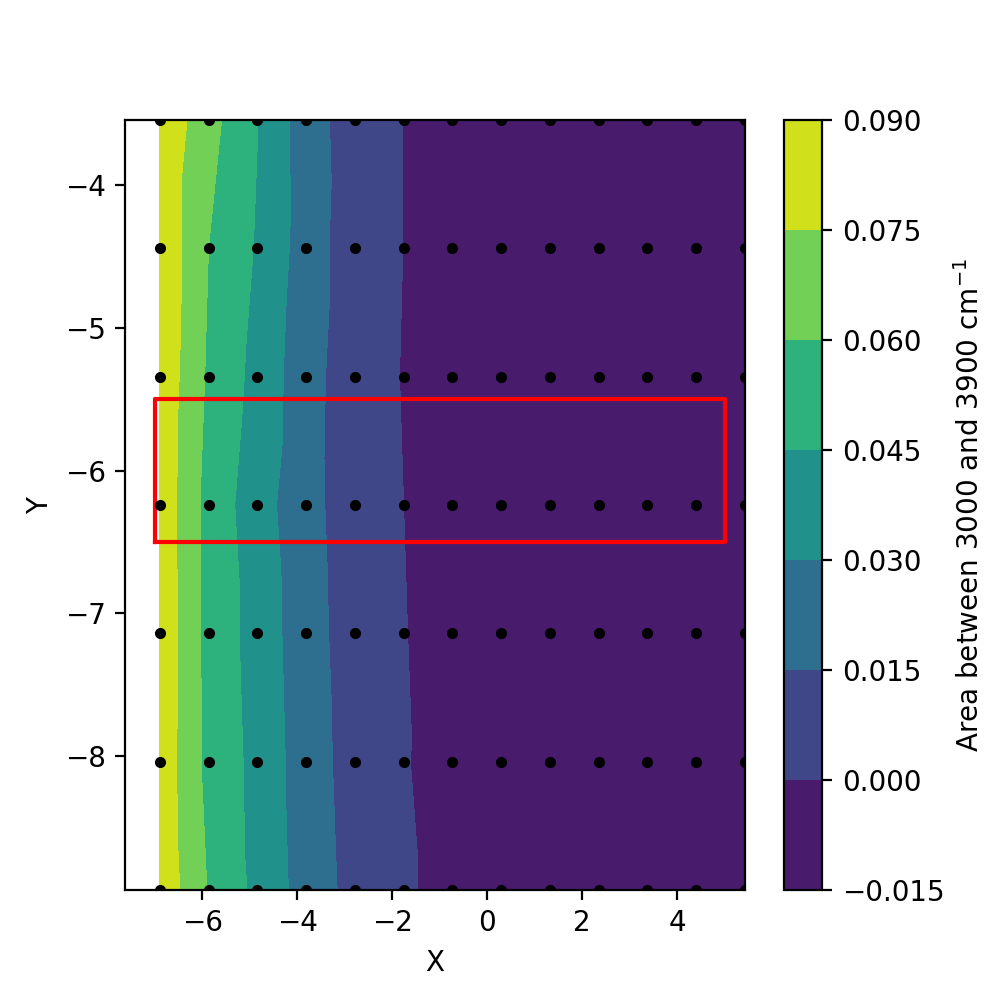

In [15]:
X_low = -7
X_high = 5
Y_low = -6.5
Y_high = -5.5

plt.figure(figsize=(5,5))
plt.tricontourf(my_map.X, my_map.Y, my_map.area)
plt.plot([X_low, X_high, X_high, X_low, X_low], 
         [Y_low, Y_low, Y_high, Y_high, Y_low], "r-")
plt.plot(my_map.X, my_map.Y, "k.")

plt.xlabel("X")
plt.ylabel("Y")
cbar = plt.colorbar()
cbar.set_label("Area between 3000 and 3900 cm$^{-1}$")
plt.savefig('carto_eau.pdf')



<IPython.core.display.Javascript object>


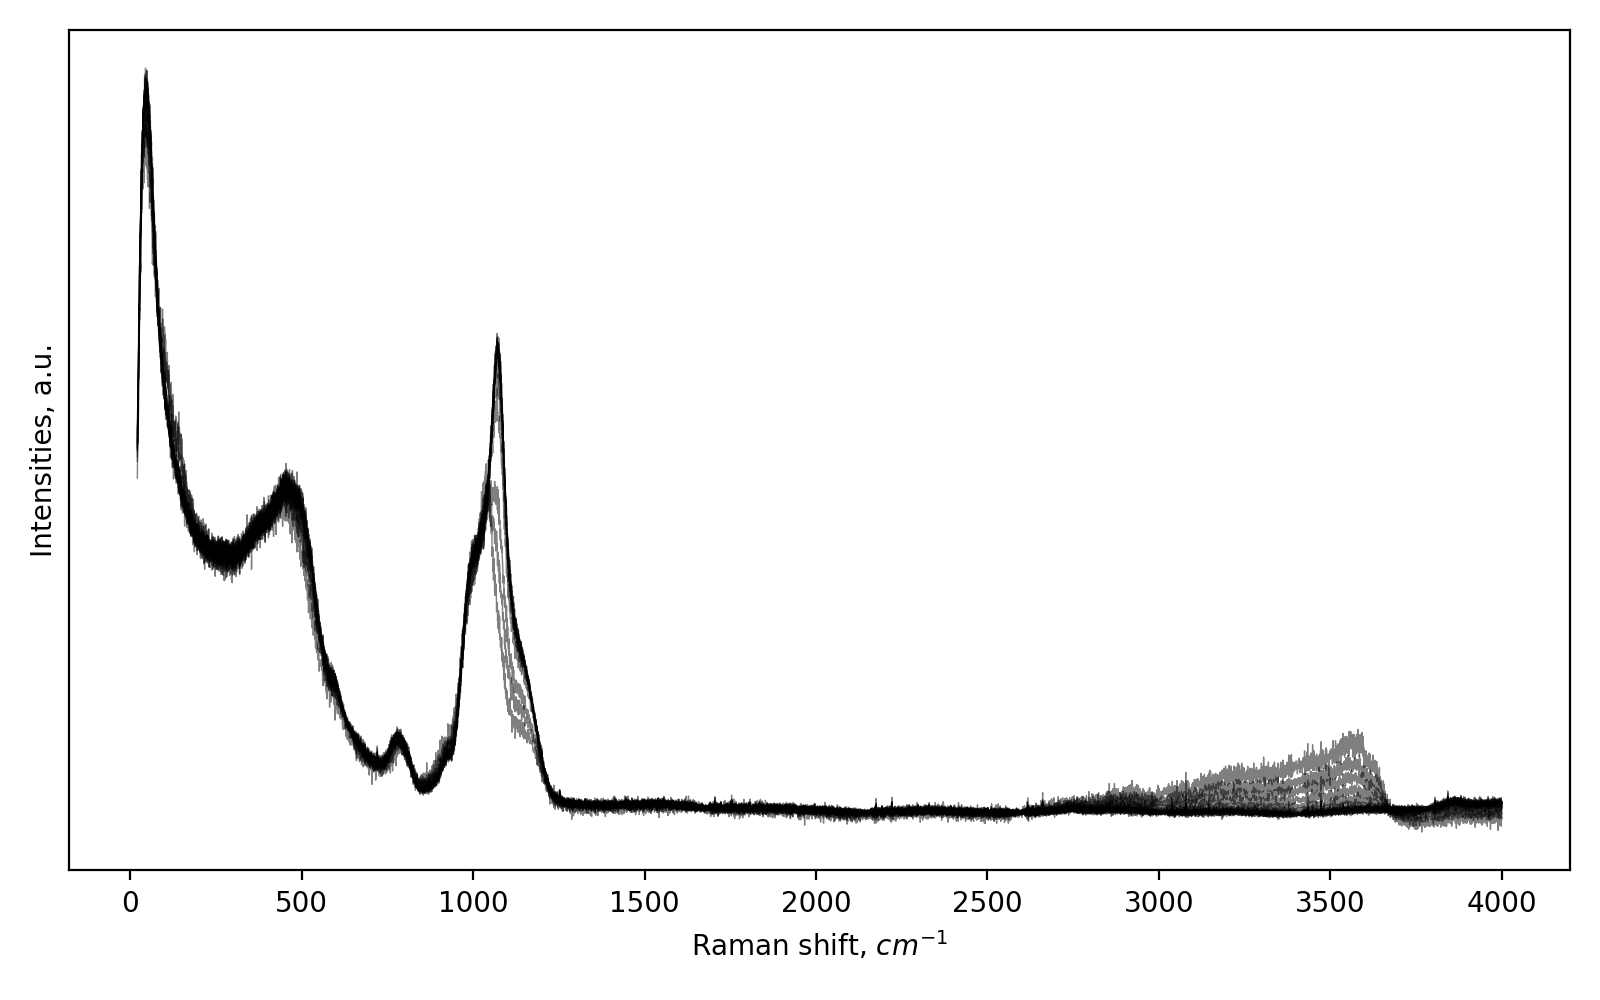

In [16]:
plt.figure(figsize=(8,5))

idx_sp = np.where((my_map.X>X_low)&(my_map.X<X_high)&(my_map.Y>Y_low)&(my_map.Y<Y_high))
for i in idx_sp:
    plt.plot(my_map.w, my_map.I_normalised[:,i],"k-",alpha=0.5, linewidth=0.5)

#plt.xlim(3000,4000)
#plt.ylim(0,500)
plt.xlabel('Raman shift, $cm^{-1}$')
plt.ylabel('Intensities, a.u.')
plt.tick_params(left = False, labelleft=False)    
plt.tight_layout()
plt.savefig('spectres.pdf')

<IPython.core.display.Javascript object>


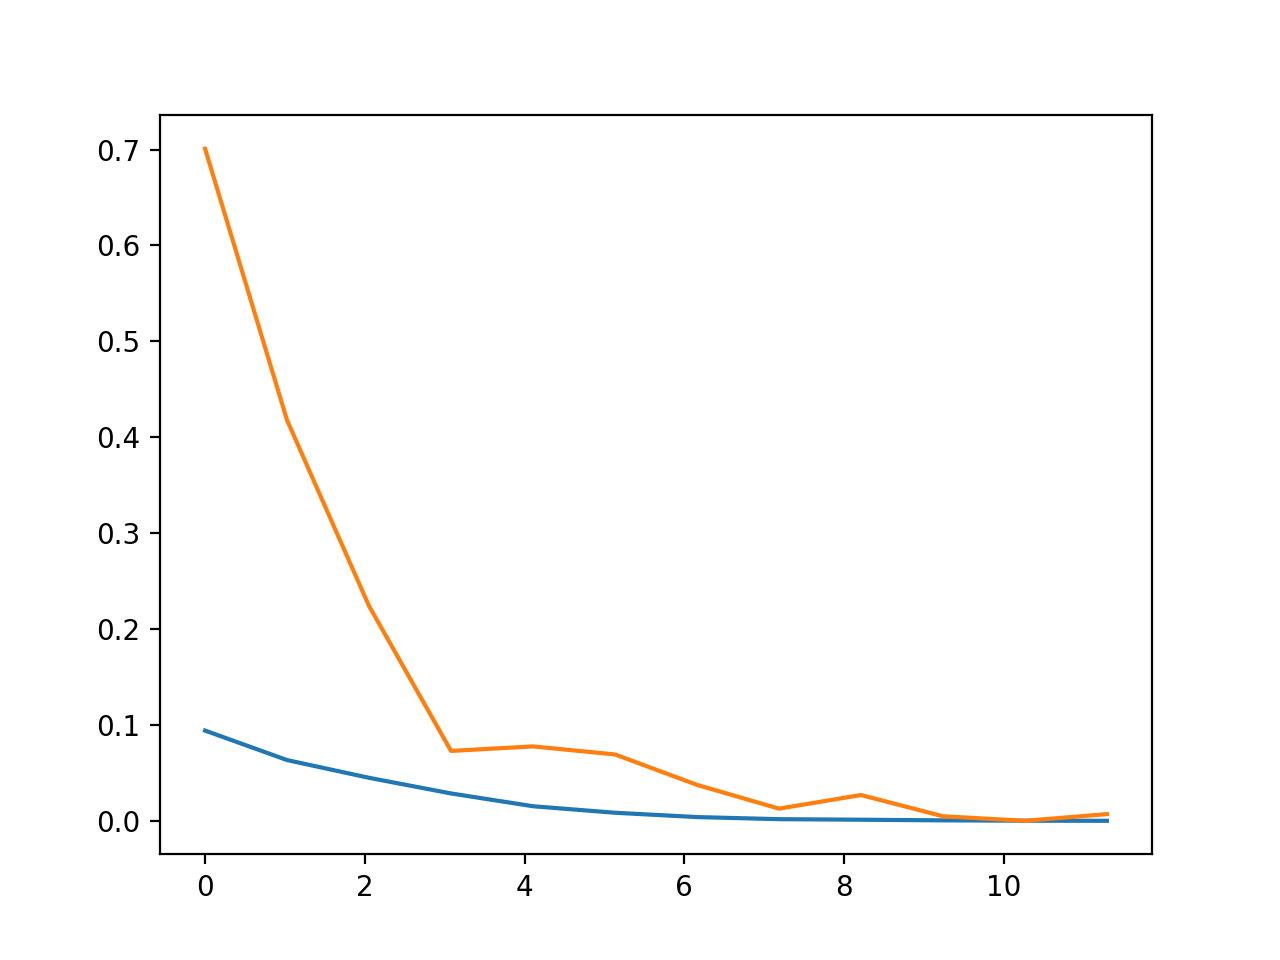

In [17]:
X_profile = my_map.X[idx_sp] - np.min(my_map.X[idx_sp])
sp_profile = my_map.area[idx_sp]
Iratio_profile = my_map.I_ratio[idx_sp]

plt.figure()
plt.plot(X_profile, sp_profile-np.min(sp_profile))
plt.plot(X_profile, Iratio_profile-np.min(Iratio_profile))

<IPython.core.display.Javascript object>


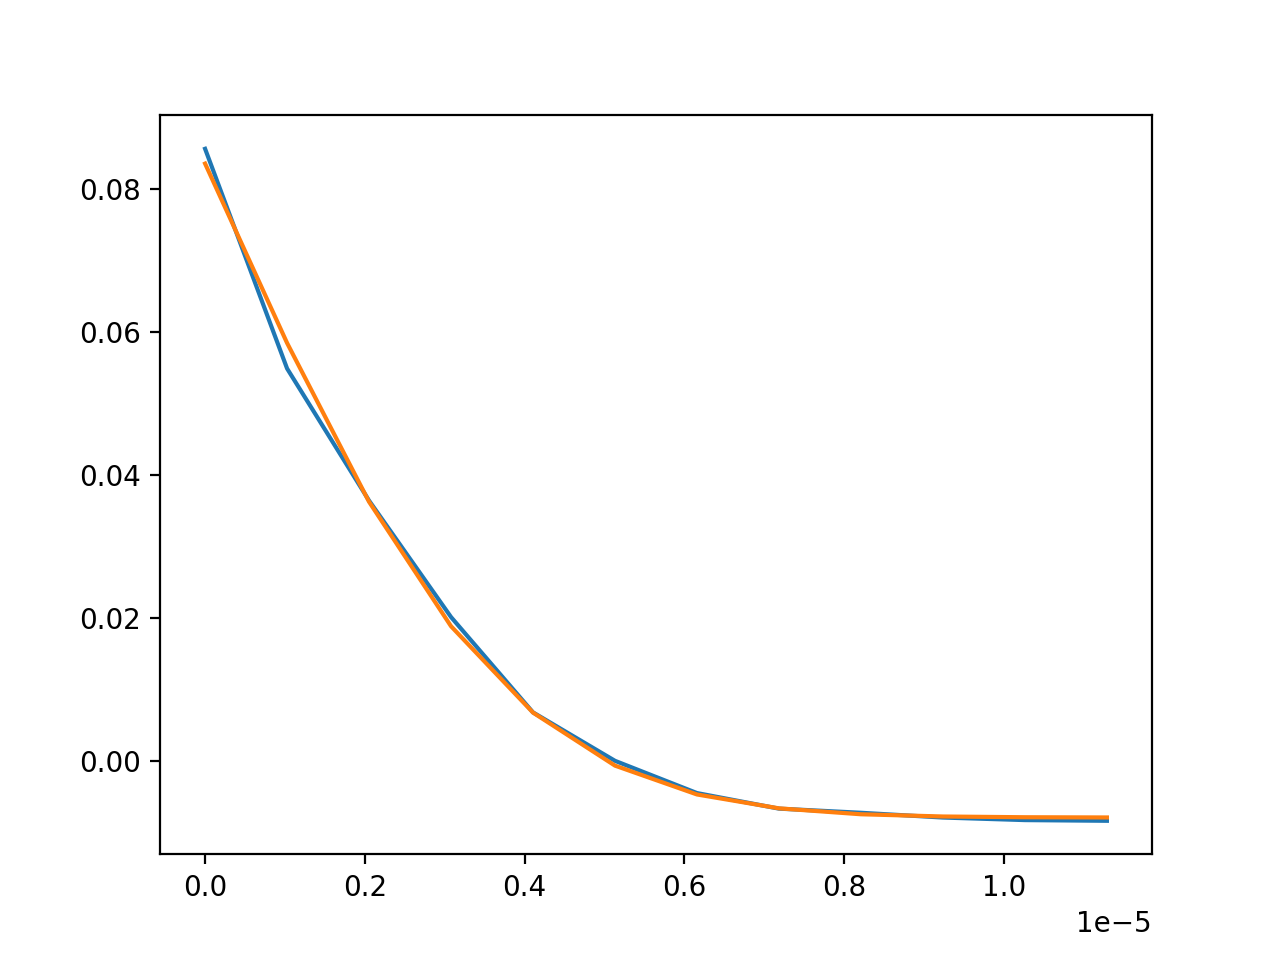

array([-0.007947560976971559+/-0.0006630482083783476,
       0.08360551782406787+/-0.0012778333401438748,
       -18.66863507841196+/-0.023036962111302576], dtype=object)

In [18]:
from scipy.optimize import curve_fit

t = 231*24*3600 # time in seconds

fun = lambda x, C0, C1, D: rp.diffshort(x,t,C0,C1,D)

popt, pcov = curve_fit(fun, X_profile*10**-6, sp_profile, p0=[-0.01, 0.05, -19])

plt.figure()
plt.plot(X_profile*10**-6, sp_profile)
plt.plot(X_profile*10**-6, fun(X_profile*10**-6,*popt))

import uncertainties
from uncertainties import unumpy

diff_coefs = unumpy.uarray(popt, np.sqrt(np.diag(pcov)))
diff_coefs



<IPython.core.display.Javascript object>


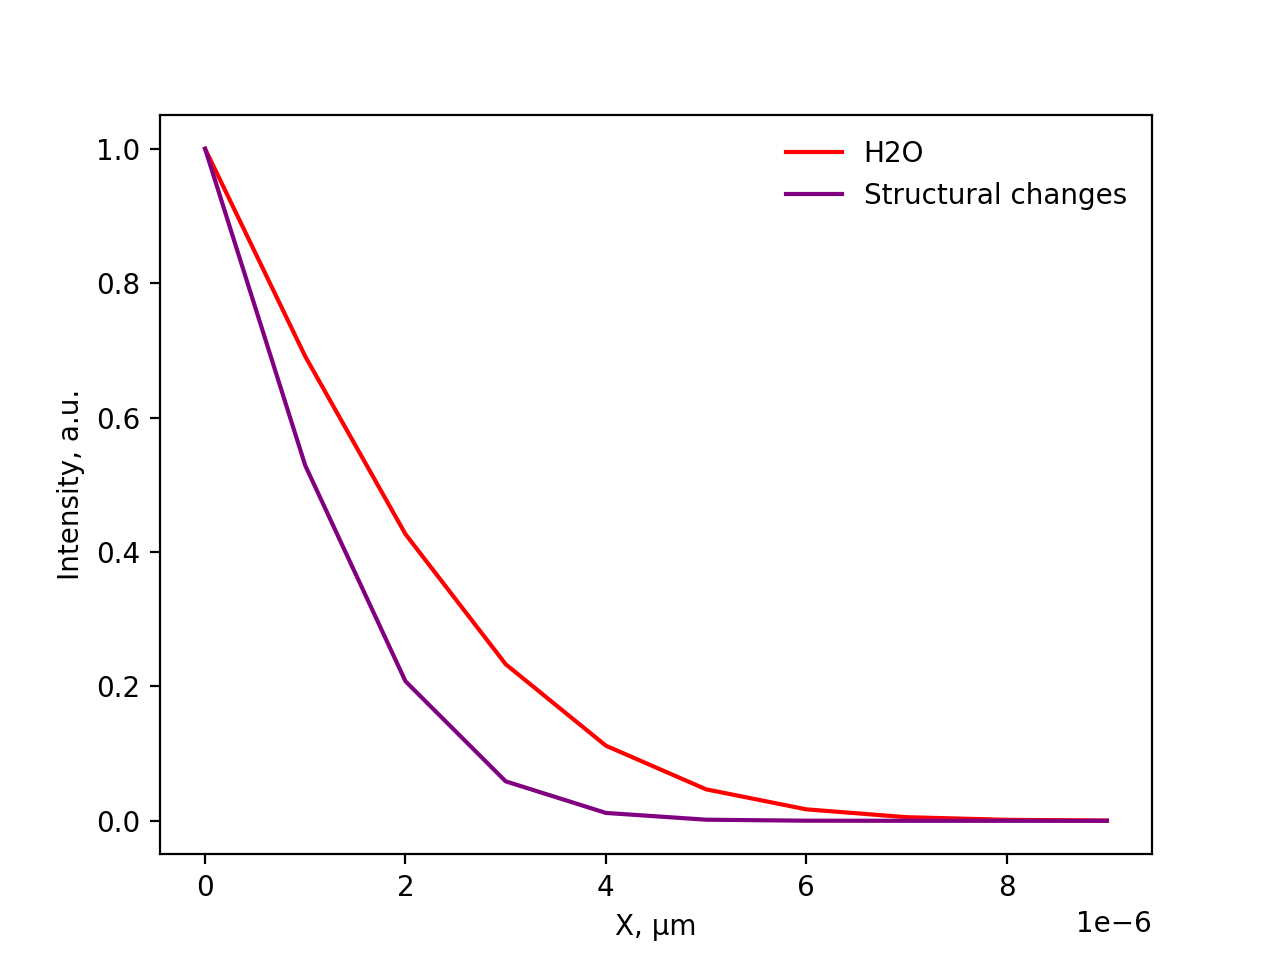

In [19]:
X_fack = np.arange(0,10,1.0)*10**-6
plt.figure()
plt.plot(X_fack, rp.diffshort(X_fack,t,0,1,-18.8),"r-", label="H2O")
plt.plot(X_fack, rp.diffshort(X_fack,t,0,1,-19.2),"-", color="purple", label="Structural changes")
plt.legend(frameon = False)
plt.xlabel('X, µm')
plt.ylabel('Intensity, a.u.')
plt.savefig("coeff_diff(X).png")

<IPython.core.display.Javascript object>


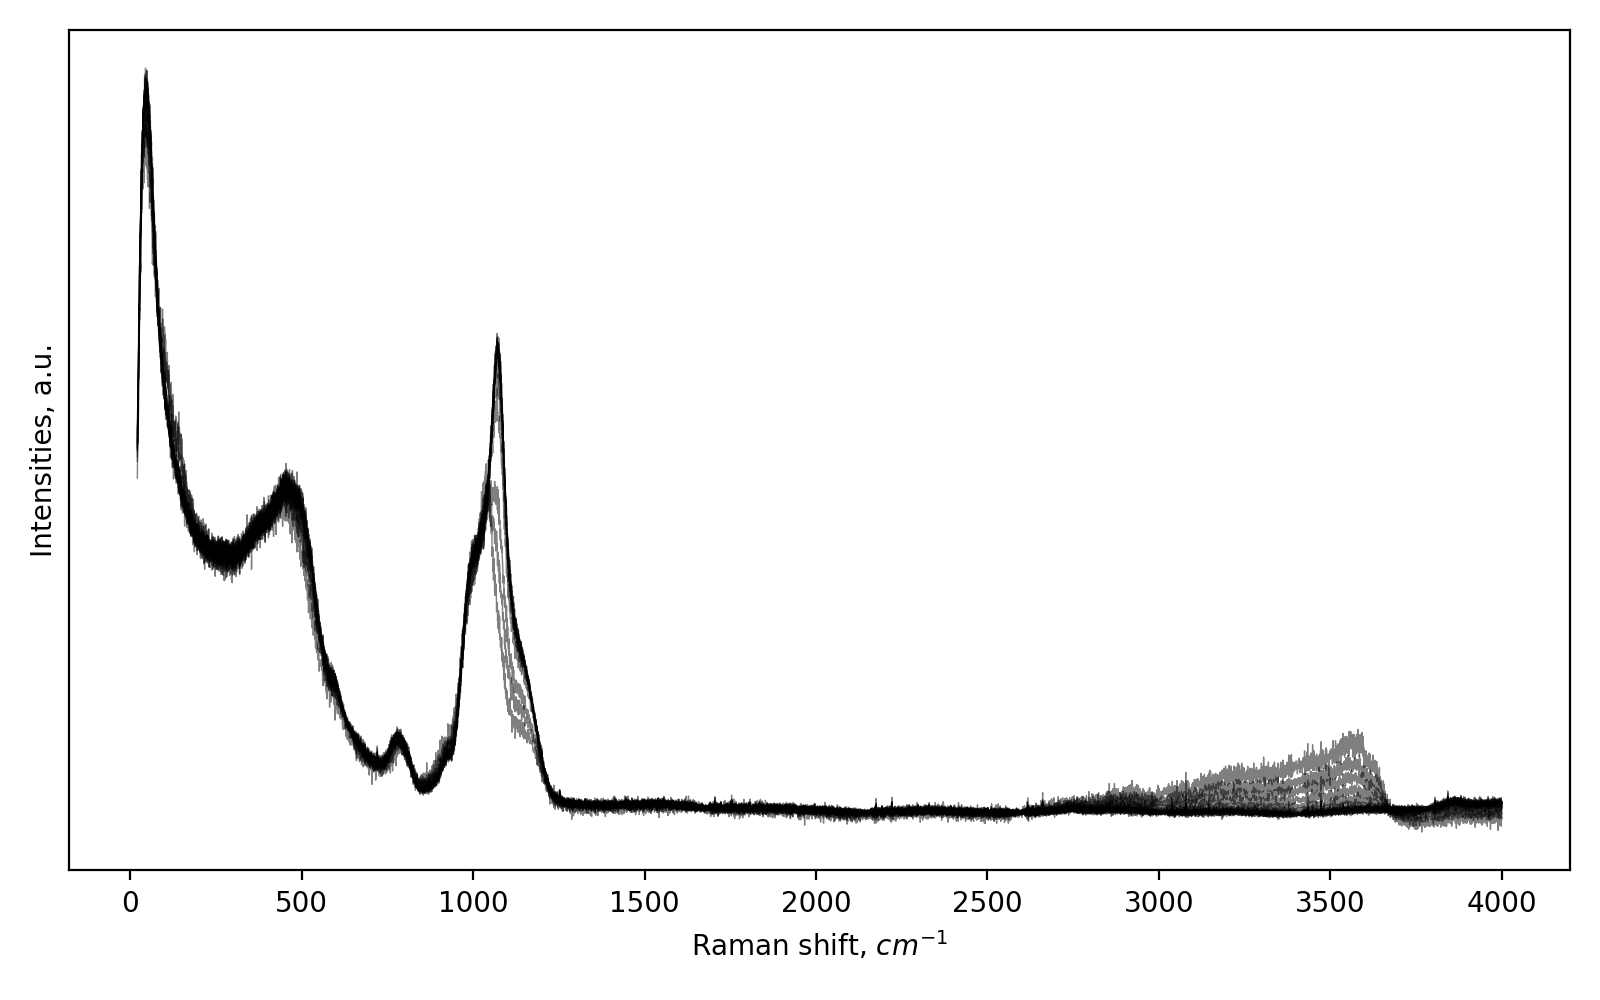

In [20]:
plt.figure(figsize=(8,5))

idx_sp = np.where((my_map.X>X_low)&(my_map.X<X_high)&(my_map.Y>Y_low)&(my_map.Y<Y_high))
for i in idx_sp:
    plt.plot(my_map.w, my_map.I_normalised[:,i],"k-",alpha=0.5, linewidth=0.5)

#plt.xlim(3000,4000)
#plt.ylim(0,500)
plt.xlabel('Raman shift, $cm^{-1}$')
plt.ylabel('Intensities, a.u.')
plt.tick_params(left = False, labelleft=False)    
plt.tight_layout()
plt.savefig('spectres.pdf')